# Introduction au Réseau neuronal convolutif avec Keras

# A - Prédiction à l'aide des Convolutional Neural Networks (CNN)

## Contexte et objectif

Le principal objectif de l'exercice est d'apprendre à construire un réseau de neurones convolutif (Convolutional Neural Network - CNN) à l'aide du package Keras, et de montrer en quoi cette architecture est plus adaptée à certains problèmes de classification.

La principale différence entre les réseaux classiques et les réseaux de neurones convolutifs réside dans le type d'entrée et dans la transition entre les couches.

Les CNN ont été construit pour traiter de la donnée de type image. Les couches de convolution sont aujourd'hui vues comme les meilleurs extracteurs de features pour des problèmes de classification liés à l'image.

Nous allons construire un réseau de neurones convolutif comprenant plusieurs types de couches: des couches de convolution ainsi que des couches de pooling et de dropout pour régulariser notre modèle.

## 1. Les différentes couches qui constituent un CNN

## Couches de Convolution

Les couches de convolution sont très utilisées pour la classification d'images. Avant d'aborder directement les opérations effectuées par une couche de convolution, il est important de comprendre l'opération à la base du neurone de cette couche, le **produit de convolution**.

Le produit de convolution est une opération qui ressemble beaucoup au produit scalaire, sauf qu'il ne s'effectue pas sur un vecteur mais sur une matrice :

D'un côté nous avons une matrice d'entrée, souvent appelée **tuile ou convolution patch** en anglais, et d'un autre nous avons une matrice de convolution, souvent appelée noyau de convolution, filtre ou convolution kernel en anglais.

**Ces deux matrices doivent absolument avoir les mêmes dimensions pour calculer leur produit de convolution**.

Les étapes du produit de convolution sont les mêmes que celles du produit scalaire:

Produit terme à terme des deux matrices.
Somme des produits.
Dans la figure interactive suivante, nous illustrons la convolution d'une image de dimensions 4 x 4 par un noyau de convolution de dimensions 3 x 3 :

    - Etape 1: Découpage de l'image en plusieurs tuiles convolables. Chaque tuile a une couleur différente.
    - Etape 2: Produits de convolutions entre chaque tuile et le noyau.
    - Etape 3: Activation et concaténation des produits en une nouvelle matrice.   
   

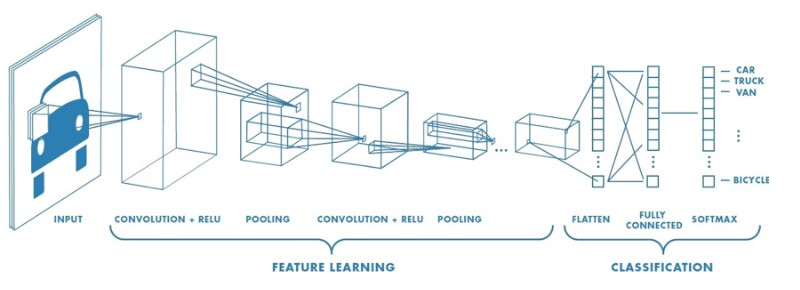

Pour quelle raison faisons-nous cette opération? Quels sont les avantages à utiliser cette technique?

La convolution d'une image est en réalité très facilement interprétable.

Dans la figure interactive suivante, nous illustrons la convolution d'une photo du Taj-Mahal par un noyau de convolution de dimensions 3 x 3.

La photo est en noir et blanc pour qu'elle corresponde à une matrice de pixels simple, mais l'opération peut être réalisée sur les matrices des composantes rouges, vertes et bleues d'une photo en couleur.

Ainsi, la convolution d'une image peut être vue comme une extraction de features. Par exemple, les noyaux servant à détecter les bords pourraient être utiles pour classifier certaines formes géométriques.

L'intérêt des neurones de convolution est que par l'entraînement ils pourront trouver eux mêmes les meilleurs noyaux de convolution à utiliser pour extraire des features à partir d'une image.

In [ ]:
""" ci-dessous les Kernels de convolution dans l'ordre de gauche à droite
- identity
- contrast
- edge detection
- vertical edge detection puis horizontal edge detection ( photo du vertical ED )
- gaussian blur ( low intensity )
"""

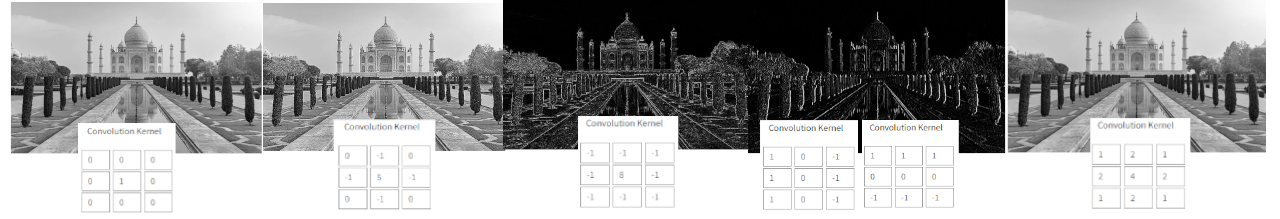

## Couches de Max-Pooling
Les couches de Max-Pooling sont utilisées lorsque les données sur lesquelles nous travaillons sont des matrices. Le concept du max-pooling est très simple:

La matrice est découpée en plusieurs petites tuiles contenant des valeurs de la matrice. De chaque tuile on extrait la valeur maximale. On recompose une matrice ne contenant que les valeurs maximales de chaque tuile. Nous avons illustré l'opération de max-pooling avec une taille de tuile 2x2 dans la figure interactive suivante. La matrice contient des valeurs représentées par la couleur bleue. Plus la cellule de la matrice est claire, plus sa valeur est élevée.

Les couches de pooling permettent notamment de diminuer la résolution de la sortie de la convolution, dans le but de diminuer le nombre d'opérations effectuées et le nombre de paramètres du modèle. Elles permettent également de trouver des motifs plus larges que la taille du kernel de la convolution puisqu'elles combinent les informations extraites de plusieurs zones adjacentes.

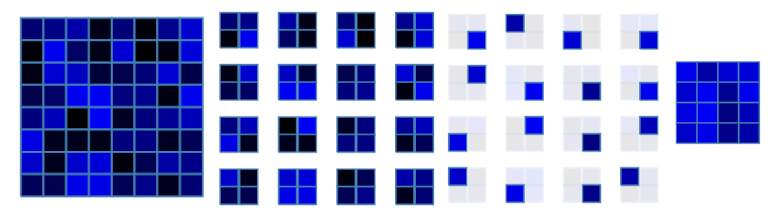

## Couches de Dropout

La technique du Dropout (ou Abandon en français) consiste à couper certaines connexions entre neurones de couches consécutives. Cette technique réduit considérablement la quantité de paramètres à entraîner et permet de "renforcer" les liens entre neurones consécutifs.

Le paramètre p donne la proportion de connexions qui seront coupées. Chaque couche de dropout d'un modèle est définie par ce paramètre.

Dans la figure interactive suivante, nous illustrons deux couches de dropout entre 3 couches denses. La première va garder 4/5 des connexions tandis que la deuxième va en garder 2/3.
- la figure se lit de haut vers le bas puis de gauche vers la droite

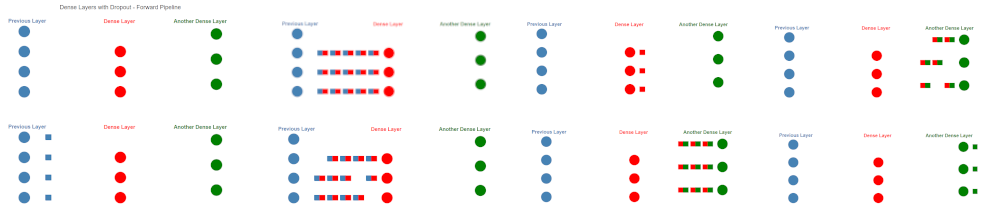

Nous allons à présent utiliser les notions abordées ci-dessus sur l'exemple de la base de données MNIST. Nous allons implémenter un réseau de neurones convolutifs pour résoudre un problème de classification des images (chiffres) de la base de données.

- (d) Exécuter la cellule suivante pour importer les packages nécessaires.

In [ ]:
%matplotlib inline
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import cm

import itertools

- (e) Recupérer les données d'entraînements et de test en exécutant la cellule suivante.

In [ ]:
# Pour importer le datasets mnist de Keras
from tensorflow.keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)

De manière générale les images en couleurs sont composées de 3 canaux Rouge/Vert/Bleu de 28x28 pixels superposés les uns sur les autres. Nos images étant en niveaux de gris, elles n'ont qu'un seul canal (profondeur = 1).

- (f) Transformer les données X_train en un tableau à 4 dimensions (nb_images, largeur, hauteur, profondeur). Chacune des images sera ainsi redimensionnée au format (28,28,1). Faire de même pour les données X_test.

In [ ]:
X_train = X_train.reshape((-1, 28, 28, 1))

X_test = X_test.reshape((-1, 28, 28, 1))

X_train.shape #Vérification des dimensions de l'ensemble d'entrainement

- (g) Diviser les pixels des données X_train et X_test par 255 afin qu'ils soient compris entre 0 et 1.
- (h) Transformer les labels de y_train et y_test en vecteurs catégoriels binaires (one hot), grâce à la fonction to_categorical du sous-module np_utils de keras.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 2. Construction de l'architecture CNN 
On rappelle qu'un neurone de convolution contient un noyau avec lequel il effectue le produit de convolution avec les différents patchs de l'image.

Dans une couche de neurones de convolution, chaque neurone possède son propre noyau de convolution. L'entraînement de cette couche consiste à trouver les noyaux les plus performants pour la classification.

En général, les couches de convolution sont suivies par des couches de pooling afin de réduire progressivement la dimension de l'entrée. Ceci permet à la fois de régulariser le modèle (en diminuant les risques d'overfitting) et d'améliorer la performance de l'algorithme en termes de temps de calcul et d'utilisation de mémoire.

Pour ajouter une couche de convolution à un modèle séquentiel, il suffit comme pour les couches denses de l'instancier avec le constructeur correspondant. Pour les couches de convolution, il s'agit du constructeur Conv2D qui contient différents paramètres:

- filters : Un entier correspondant au nombre de matrice de convolution dans la couche.
- kernel_size : Un couple d'entiers correspondant aux dimensions du noyau de convolution.
- padding : détermine si le noyau a le droit de dépasser le bord de l'image.
- input_shape : n-uplet correspondant aux dimensions de l'image d'entrée. Doit absolument être précisé dans la première couche.
- data_format : détermine quelle dimension de l'input correspond à quelle dimension de l'image.
- activation : fonction d'activation qui sera appliquée à chaque case de la sortie du neurone.

Une architecture CNN a habituellement l'aspect suivant :

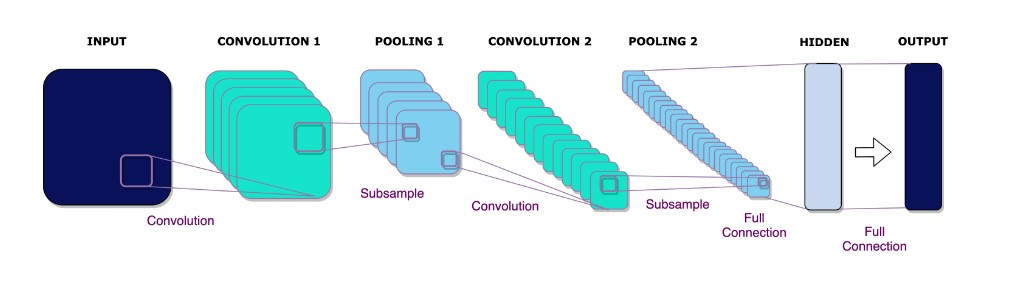

## Création et entraînement du modèle

- (a) Instancier une couche d'input prenant comme argument shape = (28,28,1).
- (b) Instancier une couche de convolution appelée first_layer à l'aide du constructeur Conv2D avec les paramètres suivants:

    - filters = 32  #La couche sera composée de 32 matrices de convolution.   
    - kernel_size = (5, 5) #le noyau de convolution sera de dimension 5x5 (25 coefficients par filtre).
    - padding = 'valid'  #pour que le noyau ne puisse pas dépasser les bords de l'image.   
    - activation = 'relu'.    
  
- (c) Instancier une couche de max-pooling appelé second_layer à l'aide du constructeur MaxPooling2D avec le paramètre pool_size = (2, 2) pour que le maximum soit calculé sur des morceaux de dimensions 2x2.

- (d) Ajouter les couches au modèle. Il faudra les ajouter dans l'ordre.

In [ ]:
inputs = Input(shape = (28, 28,1), name = "Input")

first_layer = Conv2D(filters = 32,
                     kernel_size = (5, 5),
                     padding = 'valid',
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))



x=first_layer(inputs)
x=second_layer(x)

- (e) Instancier une couche de dropout appelée third_layer à l'aide du constructeur Dropout avec le paramètre rate = 0.2 pour couper 20% des connexions entre la couche précédente et la couche suivante.
- (f) Instancier une couche d'applatissement appelée fourth_layer à l'aide du constructeur Flatten. Cette couche ne prend pas de paramètre et permet juste d'aplatir une matrice en un vecteur. Cette transformation est nécessaire pour la suite car les couches denses ne prennent que des vecteurs en entrée et non des matrices.
- (g) Instancier une couche dense appelée fifth_layer à l'aide du constructeur Dense avec 128 neurones et la fonction d'activation ReLU.
- (h) Instancier une couche dense appelée output_layer avec 10 neurones (pour 10 classes d'output) et une fonction d'activation softmax pour renvoyer des prédictions de probabilité pour chaque classe.
- (i) Ajouter toutes ces couches au modèle.

In [ ]:
third_layer = Dropout(rate = 0.2)

fourth_layer = Flatten()

fifth_layer = Dense(units = 128,
                    activation = 'relu')

output_layer = Dense(units = 10,
                     activation='softmax')

x=third_layer(x)
x=fourth_layer(x)
x=fifth_layer(x)

outputs=output_layer(x)



model = Model(inputs = inputs, outputs = outputs)

- (j) Compiler le modèle en utilisant la fonction de perte 'categorical_crossentropy', l'algorithme de descente de gradient 'adam' comme optimizer, ainsi que la métrique ['accuracy'].
- (k) Entraîner le modèle avec les données d'entraînement sur 10 epochs, des batchs de taille 200 et un split de test de 0,2. Stocker la sortie de l'entraînement dans une variable nommée training_history.

In [ ]:
model.compile(loss='categorical_crossentropy', # fonction de perte
              optimizer='adam',                # algorithme d'optimisation
              metrics=['accuracy'])            # métrique d'évaluation

training_history = model.fit(X_train, y_train,
                             validation_split = 0.2,
                             epochs = 10,
                             batch_size = 200)

## 3. Performances du modèle CNN 

- (a) Lancer la cellule suivante pour stocker les précisions d'entraînement et de test obtenues pendant l'entraînement.


In [ ]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']


- (b) Tracer l'évolution des précisions tout au long de l'entraînement.

In [ ]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 11, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de test
plt.plot(np.arange(1 , 11, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

- (c) Prédire les classes de l'échantillon X_test à l'aide de la méthode predict du modèle. Stocker le résultat dans un tableau nommé test_pred.
- (d) Appliquer la méthode argmax sur les tableaux test_pred et y_test pour obtenir des vecteurs d'entiers correspondant aux classes prédites et réelles. Il faudra passer l'argument 'axis = 1' pour que l'argmax soit calculée sur les colonnes et non les lignes. Stocker les sorties des appels de la méthode argmax dans des tableaux nommés test_pred_class et y_test_class.
- (e) Afficher un compte-rendu évaluatif détaillé de la perfomance du modèle grâce à la fonction classification_report du sous-module metrics de scikit-learn.

In [ ]:
test_pred = model.predict(X_test)

test_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class, test_pred_class))

La perfomance de notre modèle est encore plus robuste que celle du modèle dense de l'exercice précédent. La précision est maintenant de 99%, soit 4% de plus que le modèle précédent.

- (f) Calculer et afficher la matrice de confusion entre y_test_class et test_pred_class, appelée cnf_matrix, grâce à la fonction confusion_matrix du sous-module metrics de scikit-learn.

In [ ]:
#Réponse valable:
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)
print(cnf_matrix)

###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
classes = range(0,10)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Le modèle a toujours un peu de mal avec les chiffres 3 et 5, mais si on regarde les images sur lesquelles le modèle s'est trompé, il devient difficile de lui en vouloir.

- (g) Lancer la cellule suivante pour afficher des images sur lesquelles le modèle s'est trompé. Vous pouvez la relancer plusieurs fois pour afficher d'autres images.

In [ ]:
error_indexes = []
for i in range(len(test_pred)):
    if (test_pred_class[i] != y_test_class[i]):
        if(y_test_class[i] == 5 or y_test_class[i] == 3):
            if(test_pred_class[i] == 5 or test_pred_class[i] == 3):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i] 
    img = img.reshape(28, 28)
    
    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, cmap=cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred[i][test_pred_class[i]], 2)))
    

## Ce qu'il faut retenir 
Les réseaux de neurones sont des outils de machine learning désormais accessibles offrant des résultats pouvant surpasser de loin les algorithmes classiques sur des tâches non-triviales.

Le schéma pour implémenter un modèle avec keras est très simple:

- Architecture du modèle
- Compilation du modèle
- Entraînement du modèle
- Diagnostic de l'entraînement
- Evaluation des prédictions  

## Pour aller plus loin 
Vous trouverez ici un lien Google Colab vers un exercice complet de detection du genre (homme/femme) à l'aide d'un CNN. Attention cependant, il fait appel à des notions qui sont présentés dans les 2 notebooks suivants : Énoncé, Corrigé

# B - Résolution avec l'architecture LeNet

## Contexte et objectif

Le principal objectif de l'exercice est de réaliser une reproduction de l'algorithme de Réseau de Neurones Convolutif LeNet5 sur Python avec le module Keras. Plus d'infos sur LeNet ici. http://yann.lecun.com/exdb/lenet/

L’architecture LeNet a été introduite par Yann LeCun en Novembre 1998 dans le journal Proceedings of the IEEE. Nous allons reconstruire l'architecture du réseau LeNet qui est plus élaborée que celle créée dans l’exercice précédent. Nous allons par la suite entraîner cet algorithme sur les mêmes données que le premier exercice. Le réseau LeNet comprend notamment deux couches de convolution, deux couches de pooling, ainsi que des layers de dropout.

- (a) Exécuter la cellule ci-dessous pour importer les modules nécessaires.

In [ ]:
%matplotlib inline
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools  # fonctions pour boucler efficacement ( .count()  .compress()    .chain()

- (b) Exécuter la cellule suivante pour charger les données obtenues à l'Exercice 1.

In [ ]:
# Pour importer le datasets mnist de Keras
from tensorflow.keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)

- (c) Transformer les données X_train en un tableau à 4 dimensions (nb_images, largeur, hauteur, profondeur). Chacune des images sera ainsi redimensionnée au format (28, 28, 1).
- (d) Faire de même pour les données X_test.

In [ ]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

- (e) Diviser les pixels des données X_train et X_test par 255 afin qu'ils soient compris entre 0 et 1.
- (f) Transformer les labels de y_train et y_test en vecteurs catégorielles binaires (one hot), grâce à la fonction to_categorical du sous-module np_utils de keras.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Construction de l'algorithme

L'architecture du LeNet est constituée des couches suivantes:

- Convolution 1 : 30 filtres, dimension d'entrée (28, 28, 1), dimension du noyau (5, 5), fonction d'activation ReLU, pas de dépassement du noyau.
- Max-Pooling 1 : dimension du pooling (2, 2).

- Convolution 2 : 16 filtres, dimension du noyau (3, 3), fonction d'activation ReLU, Pas de dépassement du noyau.

- Max-Pooling 2 : dimension du pooling (2, 2).

- Dropout : Connexions coupées: 20%.

- Aplatissement
- Dense 1 : 128 neurones, fonction d'activation ReLU.
- Dense 2 : 10 neurones, fonction d'activation softmax.

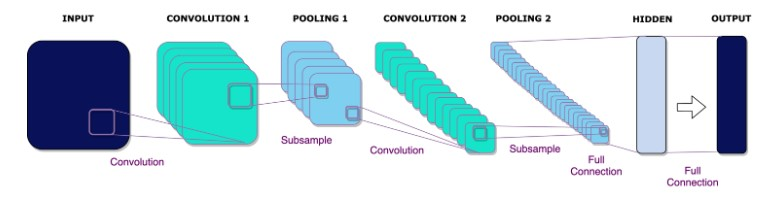

- (a) Instancier une couche d'input avec comme dimension d'entrée (28,28,1) l'ensemble de ces couches et les ajouter une à une.
- (b) Compiler le modèle avec la fonction de perte 'categorical_crossentropy', l'optimiseur 'adam' et la métrique ["accuracy"].
- (c) Entraîner le modèle avec les données d'entraînement sur 16 epochs avec des batchs de taille 200 et un split de test de 0,2. Stocker la sortie de l'entraînement dans une variable nommée training_history_lenet.

In [ ]:
# Architecture du modèle
inputs=Input(shape = (28, 28,1), name = "Input")


conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 1),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = 0.2)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 10,
                activation = 'softmax')
x=conv_1(inputs)
x=max_pool_1(x)
x=conv_2(x)
x=max_pool_2(x)


x=dropout(x)
x=flatten(x)
x=dense_1(x)
outputs=dense_2(x)

lenet = Model(inputs = inputs, outputs = outputs)

# Compilation
lenet.compile(loss='categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

# Entraînement_1
training_history_lenet = lenet.fit(X_train, y_train,          # données
                                   validation_split = 0.2,    # split de test
                                   epochs = 16,               # nombre d'epochs
                                   batch_size = 200)          # taille des batchs

- (d) Lancer la cellule suivante pour extraire de training_history_lenet les précisions sur les bases d'entraînement et de test obtenues pendant l'entraînement.

In [ ]:
train_acc_lenet = training_history_lenet.history['accuracy']
val_acc_lenet = training_history_lenet.history['val_accuracy']

Nous voulons comparer les trois réseaux que nous avons construits jusqu'à maintenant: le réseau dense, le CNN et LeNet.

- (e) Lancer la cellule suivante pour instancier, compiler et entraîner les modèles des exercices précédents. L'opération peut prendre quelques minutes

In [ ]:
# Réseau Dense

inputs_dense=Input(shape = (28, 28,1), name = "Input")
dense_0 = Flatten()
dense_1 = Dense(units = 20, input_dim = 784, kernel_initializer ='normal', activation ='tanh')            
dense_2 = Dense(units = 10, kernel_initializer ='normal', activation ='softmax')

x=dense_0(inputs_dense)
x=dense_1(x)
outputs_dense=dense_2(x)

# CNN

inputs_cnn=Input(shape = (28, 28,1), name = "Input")
cnn_1 = Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', input_shape = (28, 28, 1), activation = 'relu')
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Dropout(rate = 0.2)
cnn_4 = Flatten()
cnn_5 = Dense(units = 128, activation = 'relu')
cnn_6 = Dense(units = 10, activation='softmax')

x=cnn_1(inputs_cnn)
x=cnn_2(x)
x=cnn_3(x)
x=cnn_4(x)
x=cnn_5(x)
outputs_cnn=cnn_6(x)

# Model
model_dense = Model(inputs = inputs_dense, outputs = outputs_dense)
model_cnn = Model(inputs = inputs_cnn, outputs = outputs_cnn)

# Compilation
model_dense.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])           
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            

# Entraînement
training_history_dense = model_dense.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)
training_history_cnn = model_cnn.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)

Nous avons stocké la sortie de leurs entraînements dans les variables training_history_dense et training_history_cnn.

- (f) Extraire de ces deux dictionnaires les précisions sur la base de test obtenues pendant l'entraînement de chacun des modèles.
- (g) À l'aide du module matplotlib.pyplot, tracer les évolutions des précisions sur la base de test des trois modèles. On rapelle que l'entraînement s'est fait sur 16 epochs pour les trois modèles.
- (h) Quel modèle vous paraît être le plus performant?

In [ ]:
val_acc_dense = training_history_dense.history['val_accuracy']
val_acc_cnn = training_history_cnn.history['val_accuracy']

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe du score de test du réseau Dense
plt.plot(np.arange(1 , 17, 1),
         val_acc_dense,
         label = 'Dense',
         color = 'blue')

# Courbe du score de test du réseau CNN
plt.plot(np.arange(1 , 17, 1),
         val_acc_cnn, 
         label = 'CNN',
         color = 'red')

# Courbe du score de test du réseau LeNet
plt.plot(np.arange(1 , 17, 1),
         val_acc_lenet, 
         label = 'LeNet',
         color = 'green')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

- (i) Prédire les classes de l'échantillon X_test à l'aide de la méthode predict du modèle LeNet. Stocker le résultat dans un tableau nommé test_pred_lenet.
- (j) Faire de même pour les deux autres modèles et stocker le résultat dans test_pred_dense et test_pred_cnn.
- (k) Appliquer la méthode argmax sur les tableaux test_pred_lenet, test_pred_dense, test_pred_cnn et y_test pour obtenir des vecteurs d'entiers correspondant aux classes prédites et réelles. Il faudra passer l'argument 'axis = 1' pour que l'argmax soit calculée sur les colonnes et non les lignes. Stocker les sorties des appels de la méthode argmax dans des tableaux nommés test_pred_lenet_class, test_pred_dense_class, test_pred_cnn_class et y_test_class.

In [ ]:
test_pred_lenet = lenet.predict(X_test)
test_pred_dense = model_dense.predict(X_test)
test_pred_cnn = model_cnn.predict(X_test)

test_pred_lenet_class = test_pred_lenet.argmax(axis = 1)
test_pred_dense_class = test_pred_dense.argmax(axis = 1)
test_pred_cnn_class = test_pred_cnn.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

- (l) Afficher un compte-rendu évaluatif détaillé de la perfomance du modèle lenet à l'aide de la fonction classification_report du sous-module metrics de scikit-learn.

In [ ]:
print(metrics.classification_report(y_test_class, test_pred_lenet_class))

- (m) Lancer la cellule suivante pour voir les images de la base de test où les trois modèles se sont trompés. Vous pouvez la relancer plusieurs fois.

In [ ]:
error_indexes = []
for i in range(len(test_pred_cnn)):
    if (test_pred_lenet_class[i] != y_test_class[i]):
        if(test_pred_dense_class[i] != y_test_class[i]):
            if(test_pred_cnn_class[i] != y_test_class[i]):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i] 
    img = img.reshape(28, 28)
    
    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img,cmap = cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))

On remarque que certains des chiffres mal identifiés sont parfois très mal écrits, certains ne sont même pas reconnaissables.

Avec un taux de précision dépassant les 99% pour quelques minutes d'entraînement, on peut affirmer qu'au moins un des trois modèles a rempli son objectif.

## Ce qu'il faut retenir

Les réseaux de neurones peuvent être construits d'une infinité de manière. Il est important de s'inspirer de la littérature scientifique pour trouver les meilleures architectures et les meilleurs paramètres. L'architecture LeNet est une des plus simples à implémenter et une des plus importantes en Deep Learning car elle est le pilier de nombreux modèles plus complexe.

# C - Estimation de l'âge d'une personne
Dans cet exercice, nous allons introduire deux concepts visant à optimiser un modèle de deep learning :

Les générateurs d'images, pour augmenter et varier un jeu de données.
Les callbacks, qui peuvent servir à optimiser le taux d'apprentissage d'un modèle, ou faire office de backup lors de la compilation.
Nous allons appliquer ces deux outils à une projet d'estimation de l'âge d'une personne avec son visage. On dispose d'un jeu de données de visages d'hommes et femmes âgés de 0 à 99 ans. Dans le cadre de cet exercice, pour alléger la durée d'entraînement des modèles (qui est très long), on restreint la base de données à des visages de personnes âgées de 18 à 45 ans.

Après une rapide exploration des données et préprocessing, nous allons entraîner un réseau neurone convolutif comprenant les méthodes classiques pour la détermination de l'âge. Des exercices d'application complémentaires en conclusion permettent d'aller plus loin dans la pratique, et même de tester le modèle de détection d'âge avec votre propre Webcam sur un modèle pré-entraîné.

Chargement des données et preprocessing 
+ (a) Exécuter la cellule suivante pour importer tous les modules nécessaires

In [ ]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder # one-hot encoding for age
from keras.utils import to_categorical

from PIL import Image 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

image_path = 'face_age/'


- (b) Exécuter la cellule suivante pour afficher 6 images de sujets âgés de 33 ans

In [ ]:
""" ne pas lancer de cellule car aucun fichier images visage + age d'archivé """

In [ ]:
#Affichage d'images 
number_of_images = 6 #Définir le nombre x d'images à afficher 
plt.figure(figsize=(10,10))
age_folder = image_path + '033'
images = os.listdir(age_folder)[:number_of_images] # Selectionner aléatoirement x images
for i in range(number_of_images):
    file = mpimg.imread(age_folder +'/'+ images[i])
    plt.subplot(number_of_images/2,2,i+1)
    plt.imshow(file)


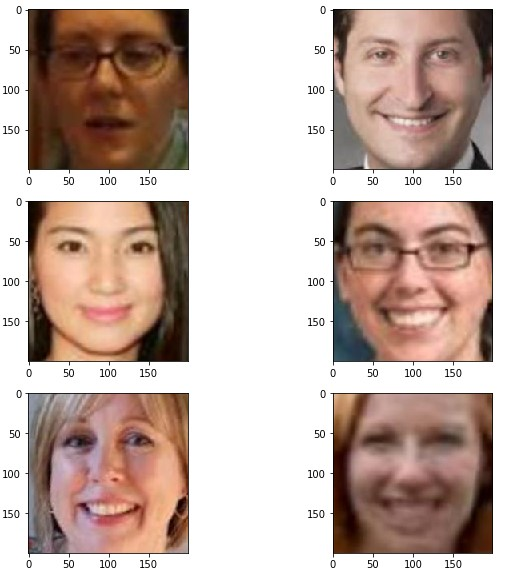

- (c) Exécuter la cellule suivante pour convertir les images et les enregistrer dans un dataframe.

In [ ]:
X = []
Y = []
width = 100
height = 100 # resize to 100x100 to solve the RAM issue in Kaggle notebooks

for folder_name,_,filenames in os.walk(image_path):
    if folder_name !="face_age" and '.DS_Store' not in filenames :
        for file in filenames:
            file_path = folder_name +"/"+ file
            image = Image.open(file_path)
            image = image.convert('RGB')
            image = image.resize((width, height))
            X.append(np.array(image))
            Y.append(int(folder_name[-3:]))
    else:
        pass

Pour que le jeu de données d'images soit exploitable, il faut normaliser les balances RGB de l'entrée X. Pour se faire :

- (d) Convertir X en array, de type flottant
- (e) Convertir Y en array
- (f) Normaliser X et afficher ses valeurs extrêmales pour vérification.

In [ ]:
# Normalise input data to range [0,1]
X = np.array(X)
X = X.astype('float32')
X /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))

Y = np.array(Y)  # -> Min: 0.000, Max: 1.000

Train-Test split  

- (g) Séparer le jeu de données en un jeu d'entraînement et de test dans des variables X_train, X_test, Y_train et Y_test . L'ensemble de test comprendra 30% de l'ensemble des données.

In [ ]:
# Train and testing split (70/30)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42,shuffle=True, stratify=Y)   

- (h) Afficher une image au hasard du jeu de données d'entraînement. On veillera à afficher l'âge de la personne choisie.

In [ ]:
print('Age =',Y_train[2])
plt.imshow(X_train[2])
plt.show()


## Générateur de données 
L'un des meilleurs moyens d'améliorer la performance d'un modèle de Deep learning consiste à ajouter davantage de données à l'ensemble d'entraînement. Dans le cadre des images, la génération de nouvelles données peut être faite en appliquant des transformations géométriques sur nos images (zoom, rotation, redimensionnement, changement de la luminosité ...) originales.



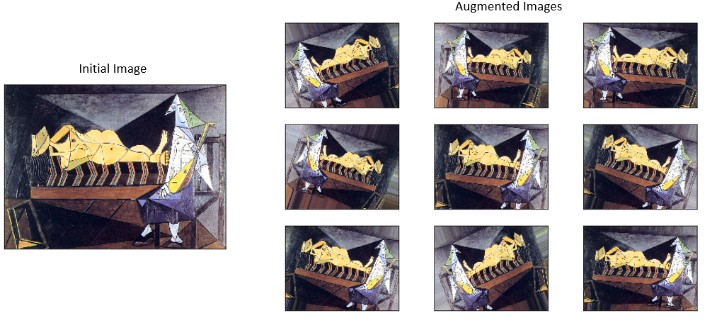

Les générateurs de données permettent de charger les images lorsque le réseau en a besoin, et de leur appliquer des transformations différentes (rotation, zoom, décalage, ...) pour chaque itération. Cette approche permet d'augmenter notre jeu de données et d'éviter au maximum le sur-apprentissage.

La fonction **ImageDataGenerator** de la classe keras.preprocessing.image génère des lots de données d’images avec une augmentation des données en temps réel (transformation). Cette fonction a notamment comme arguments :

- preprocessing_function: la fonction sera exécutée une fois l'image redimensionnée et augmentée. Elle va permettre de prétraiter les images.
- shear_range : Plage de degrés pour l'angle d'étirement de l'image.
- rotation_range: Plage de degrés pour la rotation aléatoire de l'image.
- width_shift_range: Plage pour la translation horizontale de l'image. Si l'argument est inférieur à 1, l'unité de la plage est une fraction de la largeur de l'image. Sinon, l'unité est en pixel.
- height_shift_range: Plage pour la translation verticale de l'image. Si l'argument est inférieur à 1, l'unité de la plage est une fraction de la largeur de l'image. Sinon, l'unité est en pixel.
- brightness_range: Tuple ou liste de deux floats. Plage de sélection d'une valeur de décalage de luminosité.
- zoom_range: Plage de zoom aléatoire. L'argument peut être soit un float ou une liste [inférieur, supérieur].
- horizontal_flip: Si True retourne aléatoirement ( p=12p=12 ) l'image horizontalement.
- vertical_flip: Si True retourne aléatoirement ( p=12p=12 ) l'image verticalement.   

    - (a) Exécuter la cellule suivante pour afficher l'interaction

In [ ]:
%matplotlib inline
from interaction_tl import show_generator
show_generator()
" permet de tester : rotaion range, zoom range, width shift, horizontal flip, height shift, vertical flip "

- (b) Implémenter sous le nom train_datagen un générateur d'image. Les transformations appliqueées seront :

une plage d'étirement de l'image de 0.2
un agrandissement sur une plage 0.2 de l'image.
un retournement horizontal aléatoire de l'image.   

- (c) Implémenter sous le nom test_datagen un générateur de test.

In [ ]:
train_datagen = ImageDataGenerator(
    shear_range = 0.2, # random application of shearing
    zoom_range = 0.2,
    horizontal_flip = True) # randomly flipping half of the images horizontally

test_datagen = ImageDataGenerator()

Il existe trois manières de générer des lots de données augmentées à partir des générateurs précédemment créés, qui dépendent de la forme du jeu de données. Ces méthodes sont les méthodes .flow(), .flow_from_directory()et .flow_from_dataframe(). Dans notre cas, le jeu de données est décomposé en un lot d'images, dont le label cible (l'âge) est stocké dans un vecteur Y. La méthode .flow() est donc la plus adaptée à la situation. Un exemple utilisant d'autres méthodes sera abordé dans la suite de ce module.

- (d) Dans des variables train_dataset et test_dataset, augmenter respectivement les jeu de données d'entrainement et de test en appliquant la méthode .flow à train_datagen et test_datagen. L'augmentation se fera sur 128 lots (batch_size).   

   Il faut bien veiller à utiliser X_train et Y_train (resp. X_test et Y_test) pour l'augmentation.

In [ ]:
train_dataset = train_datagen.flow(X_train,Y_train,
                         batch_size = 128)


test_dataset = test_datagen.flow(X_test, Y_test, batch_size = 128) 

## Callbacks 
Construire des modèles Deep Learning sans callbacks, c'est comme conduire une voiture sans freins fonctionnels - vous avez peu ou pas de contrôle sur l'ensemble du processus qui est très susceptible d'entraîner un désastre.

Qu’est-ce qu’un Callback? C'est un ensemble de fonctions à appliquer à des étapes données de la procédure d'apprentissage. On peut utiliser des callbacks sur les états internes et les statistiques du modèle pendant l'entraînement.

On utilise un callback pour automatiser certaines tâches après chaque epoch, ce qui permet de contrôler le processus de compilation. La bibliothèque Keras comprend divers types de callbacks (voir ce lien) pour répondre à différents types de tâches. On retrouve :

**EarlyStopping ou Arrêt anticipé**. Le surapprentissage est un cauchemar pour les praticiens du Machine Learning. Une façon de l’éviter consiste à interrompre le processus prématurément. La fonction EarlyStopping a diverses métriques / arguments que vous pouvez modifier pour définir le moment où le processus d'entraînement doit s'arrêter. Voici quelques métriques pertinentes : >

monitor : valeur surveillée, ici val_loss

min_delta : changement minimum de la valeur surveillée. Par exemple, min_delta = 1 signifie que le processus d'apprentissage sera arrêté si le changement absolu de la valeur surveillée est inférieur à 1

patience : nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté restore_best_weights: définissez cette métrique sur True si vous souhaitez conserver les meilleurs poids une fois arrêtés
L'exemple de code ci-dessous définira une classe EarlyStopping qui suit la valeur val_loss, arrête l'entraînement s'il n'y a pas de changement vers val_loss après 3 époques et conserve les meilleurs poids une fois que l'entraînement s'arrête:

from tensorflow.keras.callbacks import EarlyStopping 
earlystop = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0,
                    patience = 3,
                    verbose = 1,
                    restore_best_weights = True)
**ReduceLROnPlateau**. Lorsque qu'une métrique ne s'améliore plus d'une epoch à l'autre, on peut diminuer le taux d'apprentissage (Learning Rate) pour y remédier. Pour définir les critères et les conditions de réduction de taux d'apprentissage, on peut utiliser les paramètres suivants : > >

monitor, patience, comme définis précédemment

epsilon ou min_delta selon version, pour fixer le seuil de variation de la métrique suivie avec monitor

factor: le facteur de réduction du coefficient d'apprentissage (inférieur à 1). Ainsi le nouveau coefficient est donné par  lr2=lr1∗factorlr2=lr1∗factor 
cooldown: Nombre d'epochs de 'pause' entre deux mesures de suivis du learning rate.

L'exemple de code ci-dessous définira une classe ReduceLROnPlateau qui suit la métrique val_loss, divise le coefficient d'apprentissage par 2 si au bout de 5 epochs, val_loss n'a pas varié de 0.01. On attribue une pause de 2 epochs entre 2 cycles.

from tensorflow.keras.callbacks import ReduceLROnPlateau
earlystop = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 5,
                        factor = 0.5, 
                        cooldown = 2
                        verbose = 1)
**ModelCheckpoint** : Ce Callback enregistre le modèle après chaque époque. Voici quelques métriques pertinentes : >
filepath: le chemin du fichier dans lequel vous souhaitez enregistrer votre modèle.

monitor: la métrique suivie.

save_best_only: A définir comme True si vous ne souhaitez pas écraser le dernier meilleur modèle.

mode: 'auto', 'min' ou 'max'. Par exemple, vous définissez mode = ’min’ si la valeur surveillée est val_loss et que vous souhaitez la minimiser.

**LearningRateScheduler** : Celui-ci est assez simple: il ajuste le taux d'apprentissage au fil du temps en utilisant un calendrier que vous écrivez déjà à l'avance. Cette fonction renvoie le taux d'apprentissage souhaité (sortie) en fonction de l'époque actuelle (index d'époque en entrée) :
   from tensorflow.keras.callbacks import LearningRateScheduler
   scheduler = LearningRateScheduler(schedule, 
                      verbose = 0)
De manière générale, on définit manuellement un timer pour mesurer le temps écoulé entre les epochs de début et de fin de callback.

- (a) Exécuter la cellule suivante pour instancier la classe TimingCallback

In [ ]:
from tensorflow.keras.callbacks import Callback
from timeit import default_timer as timer

class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

In [ ]:
""" https://www.tensorflow.org/api_docs/python/tf/keras/callbacks   => doc des callbacks """

Dans le cadre de notre modèle de prédiction de l'âge, on utilisera deux callbacks : Un Early Stop et un Learning rate reducer.

- (b) Dans une variable early_stopping, instancier une fonction EarlyStopping, qui suit la métrique 'val_loss', l'entraînement s'il n'y a pas de changement de +- 0.01 vers val_loss après 5 époques en mode 'min'. On appliquera également verbose = 1 pour afficher à quel époque l'on s'arrête.
- (c) Dans une variable reduce_learning_rate, instancier une fonction ReduceLROnPlateau, qui suit également la métrique 'val_loss', divise le coefficient d'apprentissage par 10 si au bout de 3 epochs, val_loss n'a pas varié de 0.01. On attribue une pause de 4 epochs entre 2 cycles, et on veillera à afficher à quel epoch s'arrêter.
- (d) Dans une variable time_callback, instancier une fonction TimingCallback()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping( 
                                patience=5, # Attendre 5 epochs avant application
                                min_delta = 0.01, # si au bout de 5 epochs la fonction de perte ne varie pas de 1%, 
    # que ce soit à la hausse ou à la baisse, on arrête
                                verbose=1, # Afficher à quel epoch on s'arrête
                                mode = 'min',
                                monitor='val_loss')

reduce_learning_rate = ReduceLROnPlateau(
                                    monitor="val_loss",
                                    patience=3, #si val_loss stagne sur 3 epochs consécutives selon la valeur min_delta
                                    min_delta= 0.01,
                                    factor=0.1,  # On réduit le learning rate d'un facteur 0.1
                                    cooldown = 4, # On attend 4 epochs avant de réitérer 
                                    verbose=1)

time_callback = TimingCallback()


## Construction d'un CNN Classique 
Notre problèmatique d'estimation de l'âge sera modélisée selon l'architecture CNN suivante :
Plus en détail, le modèle est configuré de la manière suivante :

- Couche de Convolution comportant les paramètres suivants :
filters = 32: La couche sera composée de 32 matrices de convolution.
kernel_size = (3, 3) : le noyau de convolution sera de dimension 3x3.
activation = 'relu'.
input_shape =  (100,100,3).
On ajoutera les paramètres padding = 'valid' et kernel_regularizer=regularizers.l2(0.00001).

- Couche de Max Pooling avec comme paramètres :
pool_size = 2
strides = 2
padding = 'valid'

- Couche de Dropout avec le paramètre rate = 0.5

- Couche d'applatissement

- Couche dense à 1 neurone. L'objet d'étude étant un problème de régression, on utilisera une fonction d'activation linéaire.

## Entraînement du modèle
Dans cet exercice, nous allons construire notre modèle différemment des fois précédentes. Cela se fera séquentiellement, c'est-à-dire que nous allons le construire couche par couche depuis la couche d'entrée jusqu'à la couche de sortie.

La construction séquentielle d'un modèle avec Keras se fait très facilement avec les étapes suivantes:

- (a) Implémenter un modèle à l'aide du constructeur Sequential()
- (b) Ajouter les couches précédemment listées au modèle

In [ ]:
#Instanciation du modèle 
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",
                padding="valid",
                kernel_regularizer=regularizers.l2(0.00001),
                input_shape=(100, 100, 3)))

model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1,activation="linear"))

- (c) Compiler le modèle en utilisant la fonction de perte 'mse', un optimiseur 'adam' et la métrique ['mean_absolute_error']

In [ ]:
#Compilation du modèle
model.compile(optimizer="adam",loss="mse",metrics=['mean_absolute_error'])

- d) Entraîner le modèle en utilisant la méthode fit_generator(). Stocker cet entraînement dans la variable model_history. On utilisera les paramètres suivants :

Les données utilisées sont le jeu de données d'entraînement augmenté train_dataset
Le jeu de données de test, validation_data est test_dataset
epochs = 20
steps_per_epochs = X_train.shape[0] // batch_size
Une liste comprenant les callbacks instanciés et le timer dans le paramètre callbacks
verbose = True

   NB : L'exécution de cette phase d'entraînement peut être un peu longue, elle devrait durer 3 à 5 minutes

In [ ]:
#Entrainement du modèle, utiliser le jeu de données augmenté, et préciser les callbacks 

batch_size = 128
epochs = 20 
model_history = model.fit_generator(
            train_dataset, # use augmented images for train 
            steps_per_epoch=X_train.shape[0] // batch_size,
            validation_data = test_dataset, # use augmented images for test
            epochs = epochs,
            callbacks = [
                         reduce_learning_rate,
                         early_stopping,
                         time_callback
                        ],
            verbose=True)

In [ ]:
""" -> epoch 1/20 loss 234, mean_abs_error 12.2, val_loss 131.1, val_mean_abs_error 9.24
...
    -> epoch 20/20 loss: 46.8265 - mean_absolute_error: 5.6069 - val_loss: 45.8914 - val_mean_absolute_error: 5.3785

## Performances du modèle

- (e) Dans les variables train_loss et val_loss, stocker l'historique d'évolution de la fonction de perte à chaque epoch.

In [ ]:
train_loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
train_acc = model_history.history["mean_absolute_error"]
val_acc = model_history.history["val_mean_absolute_error"]

(f) Exécuter la cellule suivante pour afficher l'évolution de la fonction de coût et de la précision en fonction de l'epoch.

In [ ]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss per epoch (MSE)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy per epoch (MAE)')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.show()

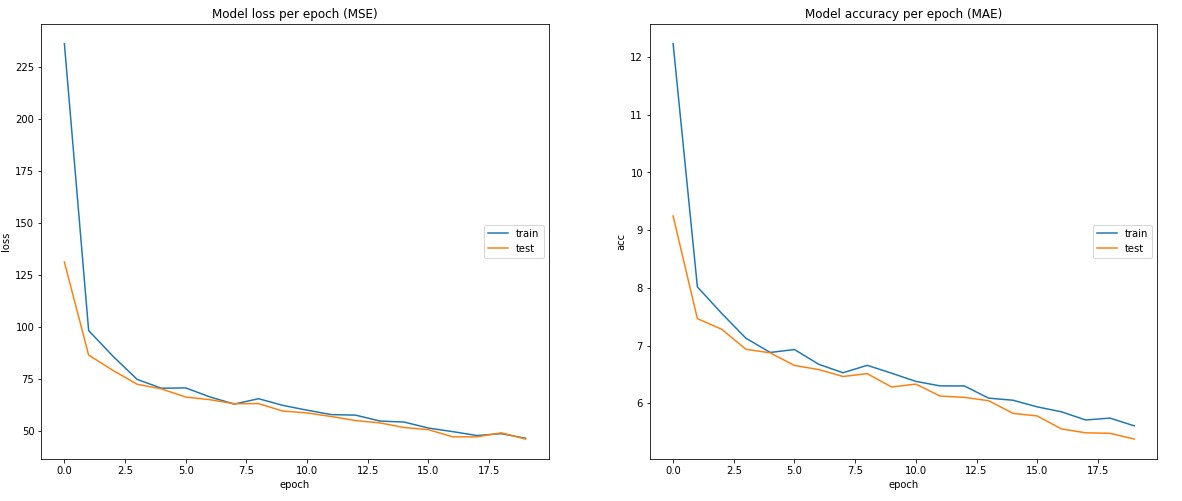

- (g) Que peut-on conclure à partir de ces indicateurs? Quelle métrique parmi la MAE et la MSE semble la plus intéressante à suivre pour mesure les performances du modèle?


## Conclusion 
Ce qu'il faut retenir
>

Les générateurs de données permettent de charger les images lorsque le réseau en a besoin, et de leur appliquer des transformations différentes (rotation, zoom, décalage, ...) pour chaque itération. Cette approche permet d'augmenter notre jeu de données et d'éviter au maximum le sur-apprentissage.
Les callbacks constituent une vraie ceinture de sécurité pour l'entraînement de vos modèles de deep learning. Grâce à eux, vous pouvez faire en sorte que votre modèle évite de stagner lors de l'apprentissage, soit en l'arrêtant de façon anticipée, soit en réduisant le taux d'apprentissage au fil des epochs. On retrouve d'autres fonctionnalités avec d'autres types de callbacks, détaillés dans la documentation officielle de Keras.
Pour aller plus loin
Un exercice complet de détection de l'âge et du genre (Vous pouvez essayer avec votre visage !) : Énoncé, Corrigé = 151.2-3 Age_&gender_detection
Un exercice de prédiction du coût d'une assurance par régression : Énoncé, Corrigé = 151.2-2_assurance_prediction_corrigé

# D - Transfer Learning
## Contexte et objectif
Dans cet exercice, nous allons travailler sur des images de tableaux publiés sur Kaggle. Le jeu de données sous forme de CSV comprend le chemin de l'image du tableau et le nom du peintre.

L'objectif de cet exercice est d'avoir un aperçu plus large du Transfer Learning et d'explorer les possibilités du Deep Learning. Nous allons effectuer dans un premier temps une exploration des données. Puis, nous allons utiliser un modèle convolutionnel déjà pré-entrainé avec le jeu de données ImageNet. Dans la conclusion de l'exercice, nous allons tester un modèle hybride combinant une partie du modèle convolutionnel précédent (extraction de caractéristiques) et un SVM (classification). Vous trouverez en conclusion des exercices complémentaires pour aller plus loin.

(a) Exécuter la cellule ci-dessous pour importer les modules nécessaires à l'exercice.

In [4]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

## Exploration des données
(b) Importer le fichier artists.csv dans un DataFrame appelé artists

(c) Afficher les 5 premières valeurs.

In [15]:
artists = pd.read_excel("151.2.4.xlsx", index_col=0)
artists.head()

,name,years,genre,nationality,paintings
id,,,,,
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,70
3,Claude Monet,1840 - 1926,Impressionism,French,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,194


- d) Afficher le nombre de peintres en fonction de leur nationnalité sous forme d'un graphique en barre.

C:\Users\UserPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


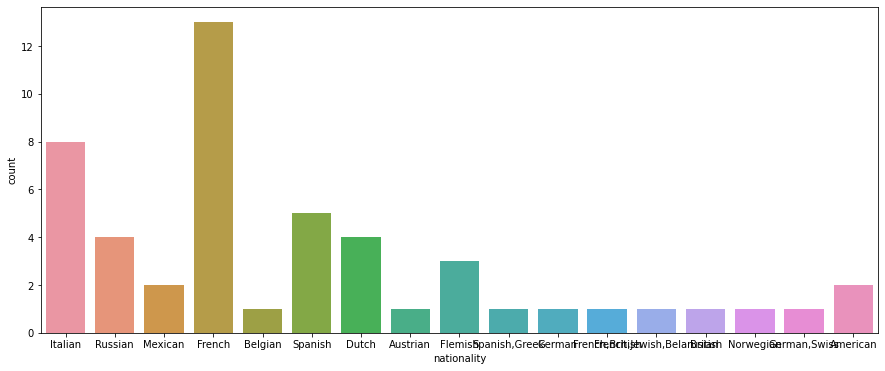

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(artists["nationality"])

plt.show() 
# Or
# artists["nationality"].value_counts().plot.bar()

- (e) Afficher le nombre de tableau en fonction de la nationalité des peintres sous forme d'un graphique en barre.

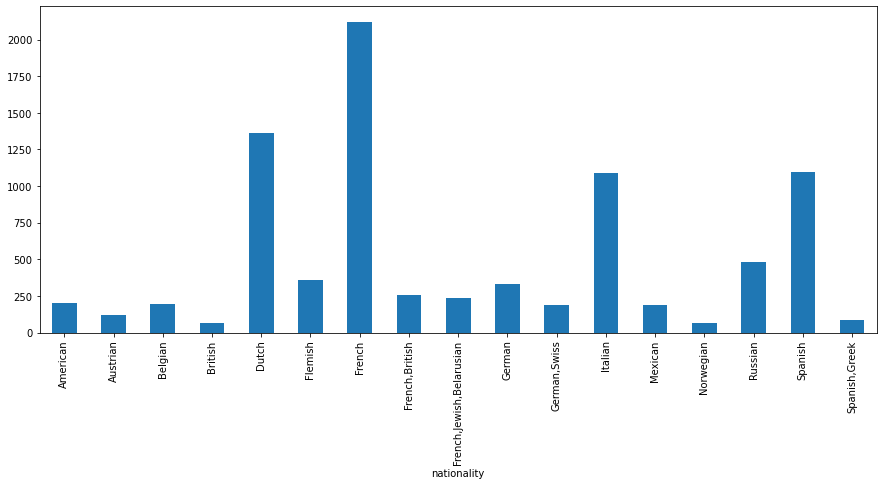

In [17]:
plt.figure(figsize=(15,6))

df2 = artists.groupby("nationality").sum()
df2["paintings"].plot.bar()

plt.show()


Pour la suite de l'exercice et par souci de puissance de calcul, nous utiliserons le fichier Data_tableaux comprenant :

Un fichier Train

Un fichier Test

Ces deux fichiers comprennent respectivement 80% et 20% des tableaux repertoriés dans 'artists.csv' sur une selection de seulement 5 artistes.

Le fichier à été organisé de cette manière pour ne pas avoir à charger l'image à l'aide d'un chemin mais directement grâce à la fonction flow_from_directory() utilisée plus bas pour le generateur.

Pour mieux comprendre l'organisation de ce fichier, en voici une illustration :

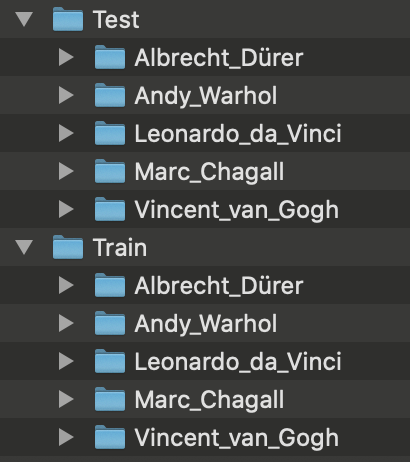

## Générateur de données 
- (a) Implémenter sous le nom train_data_generator un générateur d'image. Les transformations appliquées sur notre image seront :

une fonction de prétraitement du modèle VGG16 : preprocess_input.
une rotation aléatoire sur une plage de 10 degrées.
une translation verticale et horizontale sur une plage de 10% des dimensions de l'images.
un agrandissement sur une plage 10% de l'image.
un retournement aléatoire horizontal de l'image.
- (b) Implémenter sous le nom test_data_generator un générateur de test. On appliquera sur notre image uniquement la fonction de prétraitement preprocess_input.

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        zoom_range = 1.1,
        horizontal_flip = True
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)

Dans la cellule précédente, nous avons créé un générateur d'images prenant un lot d'images et leur appliquant des transformations. Nous allons maintenant créer un itérateur permettant de générer un nouveau lot de données à chaque itération pendant l'apprentissage. On utilisera la méthode .flow_from_directory() de notre générateur d'images.

La méthode flow_from_directory a notamment comme arguments :

directory: chemin du répertoire des images (par défaut: aucun).
classes : Liste facultative de sous-répertoires de classe. Par défaut : 'None'. Si elle n'est pas fournie, la liste des classes sera automatiquement déduite des noms des sous-répertoires, où chaque sous-répertoire sera traité comme une classe différente.
class_mode: le mode d'acception de l'ensemble des classes :
'binary': Tableau numpy 1D binaire des classes. Exemple : [0,1,0,1,1]
'categorical': Tableau numpy 2D du one-hot encoding (dichotomisation) des classes.
'sparse': Tableau numpy 1D du numéro des classes. Exemple : [22,13,1,3]
target_size: Taille (hauteur, largeur) du redimensionnement des images.
batch_size: Taille du jeu de données généré à chaque itération.
Cette méthode permettra de charger les images, de générér pour chaque iteration des lots de données (batchs) transformé par le générateur d'images.

(c) Implémenter sous le nom train_generator un itérateur à l'aide de la méthode flow_from_directory de l'objet train_data_generator. On choisira des images de taille (224,224) et la taille des lots de données (batchs) de 32.
   La colonne class des dataframes est sous la forme de numéro de classe.
(d) Implémenter sous le nom test_generator un iterator à l'aide de la méthode flow_from_directory de l'objet test_data_generator. On choisira des images de taille (224,224) et la taille des lots de données (batchs) de 32.
   Pour optimiser le temps de calcul, il est préférable de charger les images en mémoire RAM en utilisant la méthode flow à la place de flow_from_dataframe. Mais une telle approche demande d'avoir la mémoire RAM nécéssaire

In [ ]:
batch_size = 32


train_generator = train_data_generator.flow_from_directory(directory="Train",
                                                           class_mode ="sparse",
                                                          target_size = (224 , 224), 
                                                          batch_size = batch_size)

test_generator = test_data_generator.flow_from_directory(directory="Test",
                                                         class_mode ="sparse",
                                                        target_size = (224 , 224), 
                                                        batch_size = batch_size)

In [ ]:
# -> 
# Found 1674 images belonging to 6 classes.
# Found 422 images belonging to 6 classes.

## Transfer Learning 
Principe
L'apprentissage par transfert est le phénomène par lequel un apprentissage nouveau est facilité grâce aux apprentissages antérieurs partageant des similitudes. Par exemple, les connaissances acquises lors de l’apprentissage de la reconnaissance des voitures peuvent s’appliquer lorsqu’on essaie de reconnaître des camions.

Les modèles existants (VGG, ResNet, ...) sont composés de deux grandes parties. La première est un ensemble de convolution permettant l'extraction des features de l'image. La seconde est une succession de dense layer qui a pour but de classifier.

Le nouveau problème de classification doit être assez semblable avec le jeu de données utilisé pour le pré-entrainement. Dans ce cas, nous allons initialiser les poids de la partie d'extraction de features de notre modèle par les poids du modèle pré-entrainé. Les couches de la partie de classification seront remplacées et initialisées de manière aléatoire.

Lors du début de l'apprentissage, il est nécéssaire de "freezer" (bloquer) les poids de la partie pré-entrainée puisqu'ils sont proches des poids optimaux. Puis, au cours de l'entraînement, on peut "unfreeze" les couches pour affiner les poids du modèle :

Modèle
La fonction VGG16 de la classe keras.applications.vgg16 permet de charger un modèle VGG16. Cette fonction a notamment comme arguments :

include_top: ajouter les couches denses de classification.
weights: si None, les poids sont initialisés de manière aléatoire. Et si 'imagenet', les poids sont initialisés au poids de ImageNet.
Un exemple pour créer un modèle VGG16 et "freezer" ses couches:

base_model = VGG16(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False    
model = Sequential()
model.add(base_model)

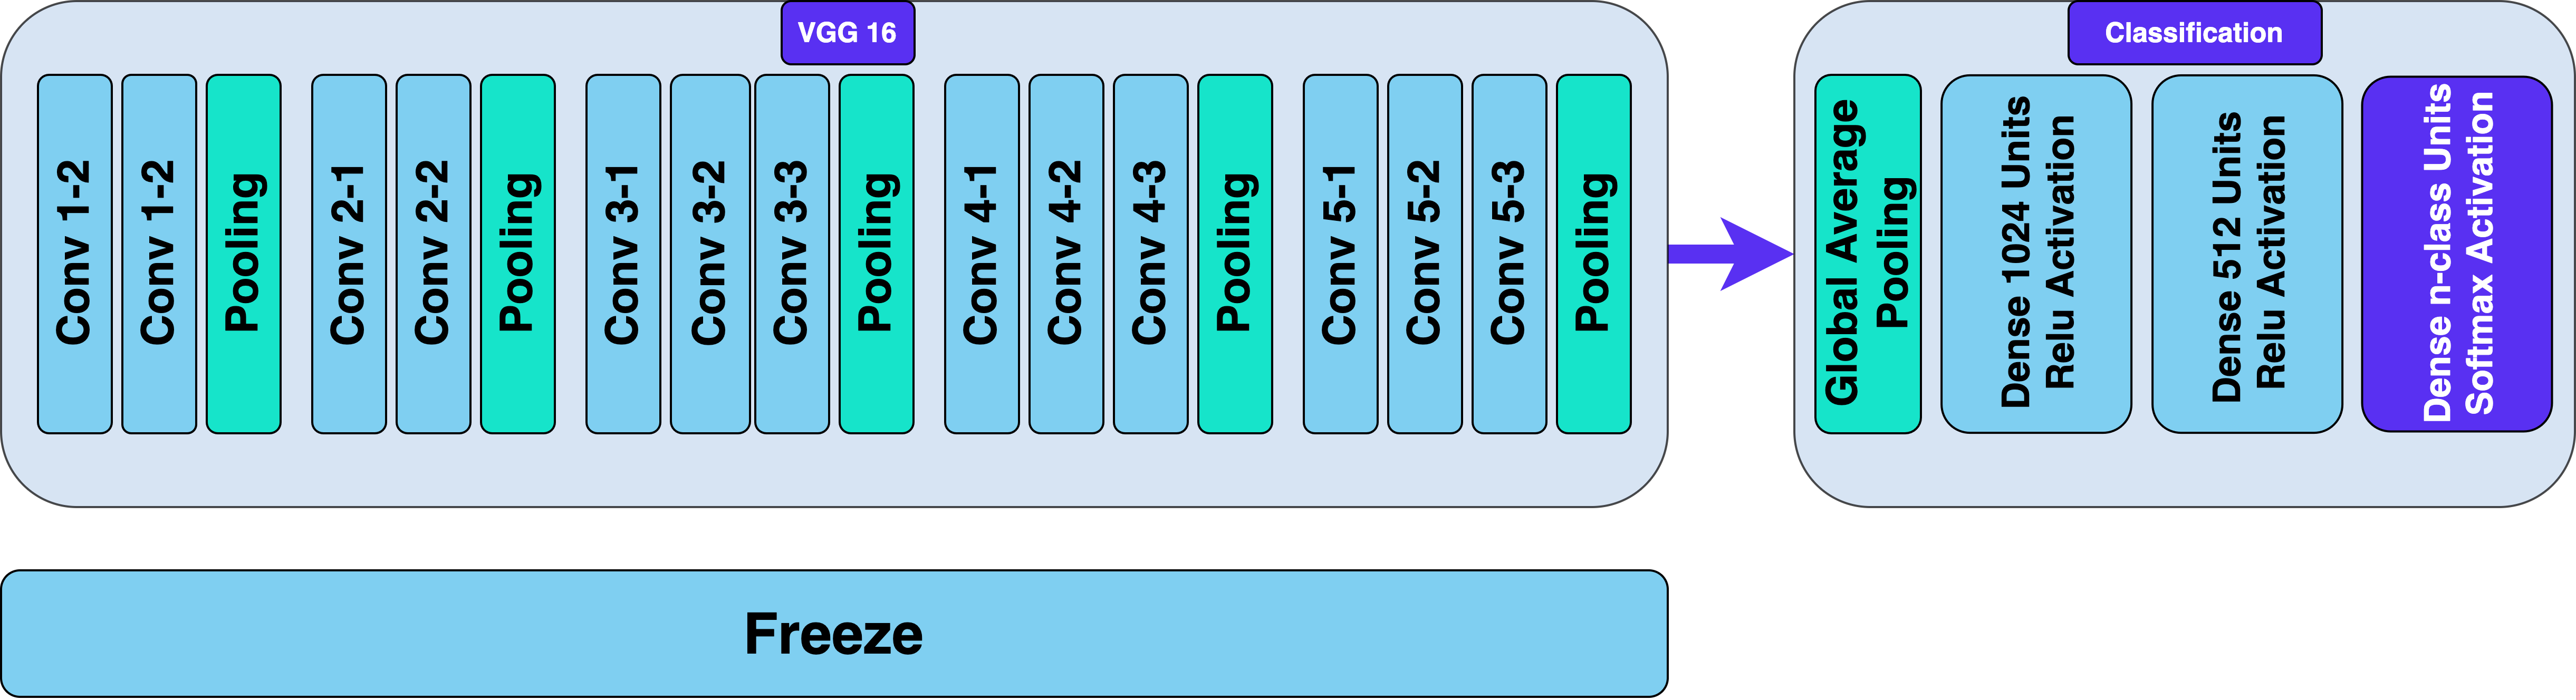

Dans cette version de Tensorflow, pour un problème de classification multi-classes avec softmax, le nombre de neurones en sortie nb_units conditionne le numéro des labels à l'intervalle [0, nb_units), on va donc utiliser en sortie nb_units = n_class + 1 où n_class = 5, pour bien prendre en compte la 5e classe.

(a) Implémenter le modèle défini sur l'image précédente sous le nom model.
(b) Utiliser une optimiseur 'adam', une fonction de coût 'sparse_categorical_crossentropy' et une métrique 'acc'

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

n_class=5
# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False) 
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

model = Sequential()
model.add(base_model) # Ajout du modèle VGG16
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(n_class + 1, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

Dans les parties précédentes, nous avons implémenté les génerateurs et le modèle. Il ne reste plus qu'à entraîner le modèle.

La méthode fit_generator appliquée au modèle permet d'entraîner le modèle avec des générateurs. La méthode a comme argument :

generator: Générateur d'entraînement.
steps_per_epoch: Nombre d'itérations pour chaque époque lors de l'entraînement
epochs: Nombre d'époques.
workers: Nombre de coeurs du processeur utilisés (-1 : tous) pour réaliser l'entraînement.
validation_data: Données utilisées pour le test.
validation_steps: Nombre d'itérations lors du test.

- (c) Entraîner le modèle avec la méthode fit_generator. Stocker l'historique de l'apprentissage dans la variable history.

In [ ]:
history = model.fit_generator(generator=train_generator, 
                                epochs = 5,
                                steps_per_epoch = 1674//batch_size,
                                validation_data = test_generator,
                                validation_steps = 422//batch_size
                                )



- (d) Afficher la courbe de la fonction de coût et de précision en fonction de l'epoch.

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()
# graph 1 = model loss by epoch et                              graphe 2 = model acc by epoch

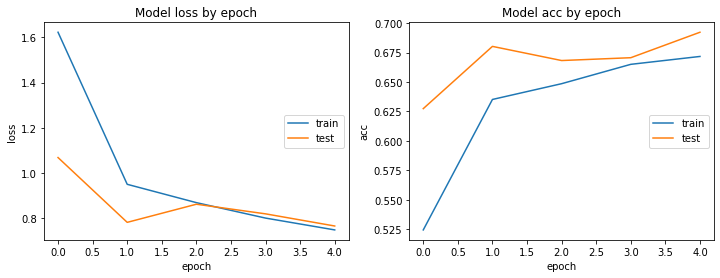

Lors de l'apprentissage précédent, nous avons "freezé" les poids du modèle VGG16 CNN puisqu'ils étaient proches des poids optimaux et que les poids du classifieur étaient initialisés de manière aléatoire.

Nous allons maintenant rechercher une meilleure solution en reprenant notre modèle appris précédément et "dé-freezer" les couches les unes après les autres du vgg16. De plus, nous utilisons une learning rate plus faible pour ajuster plus finement les paramètres.

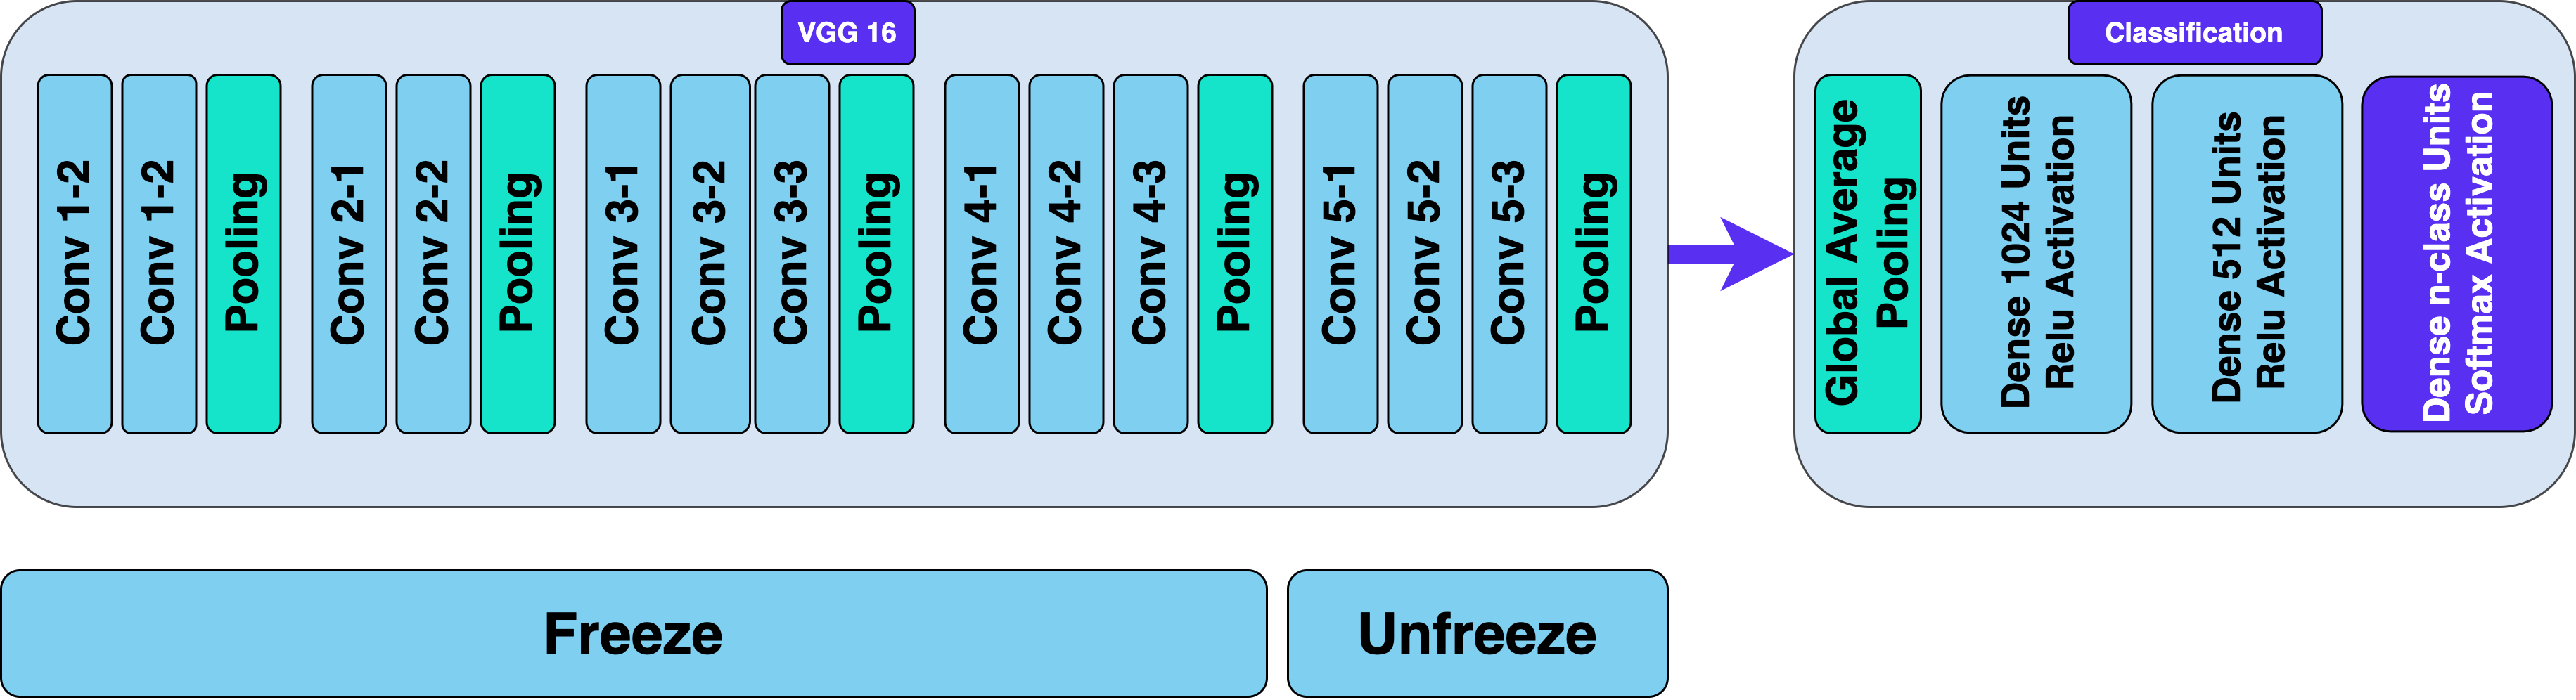

- Le code suivant permet de "dé-freeze" les 4 dernières couches du modèle base_model :

for layer in base_model.layers[-4:]:
    layer.trainable = True
(e) "Dé-freezer" les 4 dernières couches du modèle vgg16.

In [ ]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

- (f) A l'aide de la méthode compile appliquée au modèle global, utiliser l'optimizer Adam avec un learning rate lr de  10^−4 . Nous allons toujours utiliser fonction de coût 'sparse_categorical_crossentropy' et une métrique ['accuracy'].

- (g) Entraîner le modèle avec la méthode fit_generator. Stocker l'historique de l'apprentissage dans la variable history.

In [ ]:
model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator=train_generator, 
                                epochs = 5,
                                steps_per_epoch = 1310//batch_size,
                                validation_data=test_generator,
                                validation_steps=334//batch_size
                                )

In [ ]:
"""
Epoch 1/5
40/40 [==============================] - 83s 2s/step - loss: 0.8971 - accuracy: 0.6398 - val_loss: 1.2091 - val_accuracy: 0.6469
Epoch 2/5
40/40 [==============================] - 81s 2s/step - loss: 0.7077 - accuracy: 0.6940 - val_loss: 0.7016 - val_accuracy: 0.7281
Epoch 3/5
40/40 [==============================] - 81s 2s/step - loss: 0.6625 - accuracy: 0.7067 - val_loss: 1.1776 - val_accuracy: 0.6844
Epoch 4/5
40/40 [==============================] - 81s 2s/step - loss: 0.6205 - accuracy: 0.6963 - val_loss: 0.8826 - val_accuracy: 0.7000
Epoch 5/5
40/40 [==============================] - 81s 2s/step - loss: 0.6097 - accuracy: 0.7186 - val_loss: 1.3669 - val_accuracy: 0.7063
"""

- h) Afficher la courbe de la fonction de coût et de précision en fonction de l'epoch à l'aide de la cellule suivante.

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

#  graphe 1 = model loss by epoch              graphe 2 = model acc by epoch

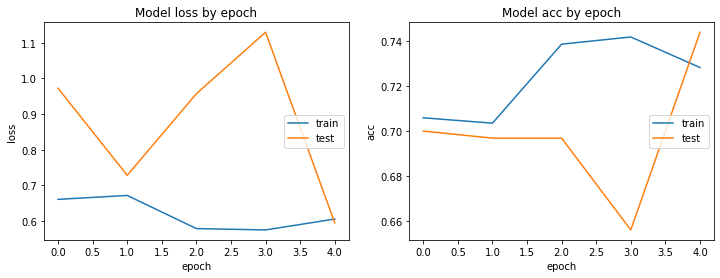

## Features extraction 
Une autre approche combinant les méthodes classiques de classification (SVM, RandomForest ...) de machine learning et les méthodes de Deep Learning est l'extraction de features. En utilisant la partie d'extraction des features du modèle de deep learning et en la combinant avec un modèle de classification classique, nous pouvons réussir à avoir de meilleurs résultats :

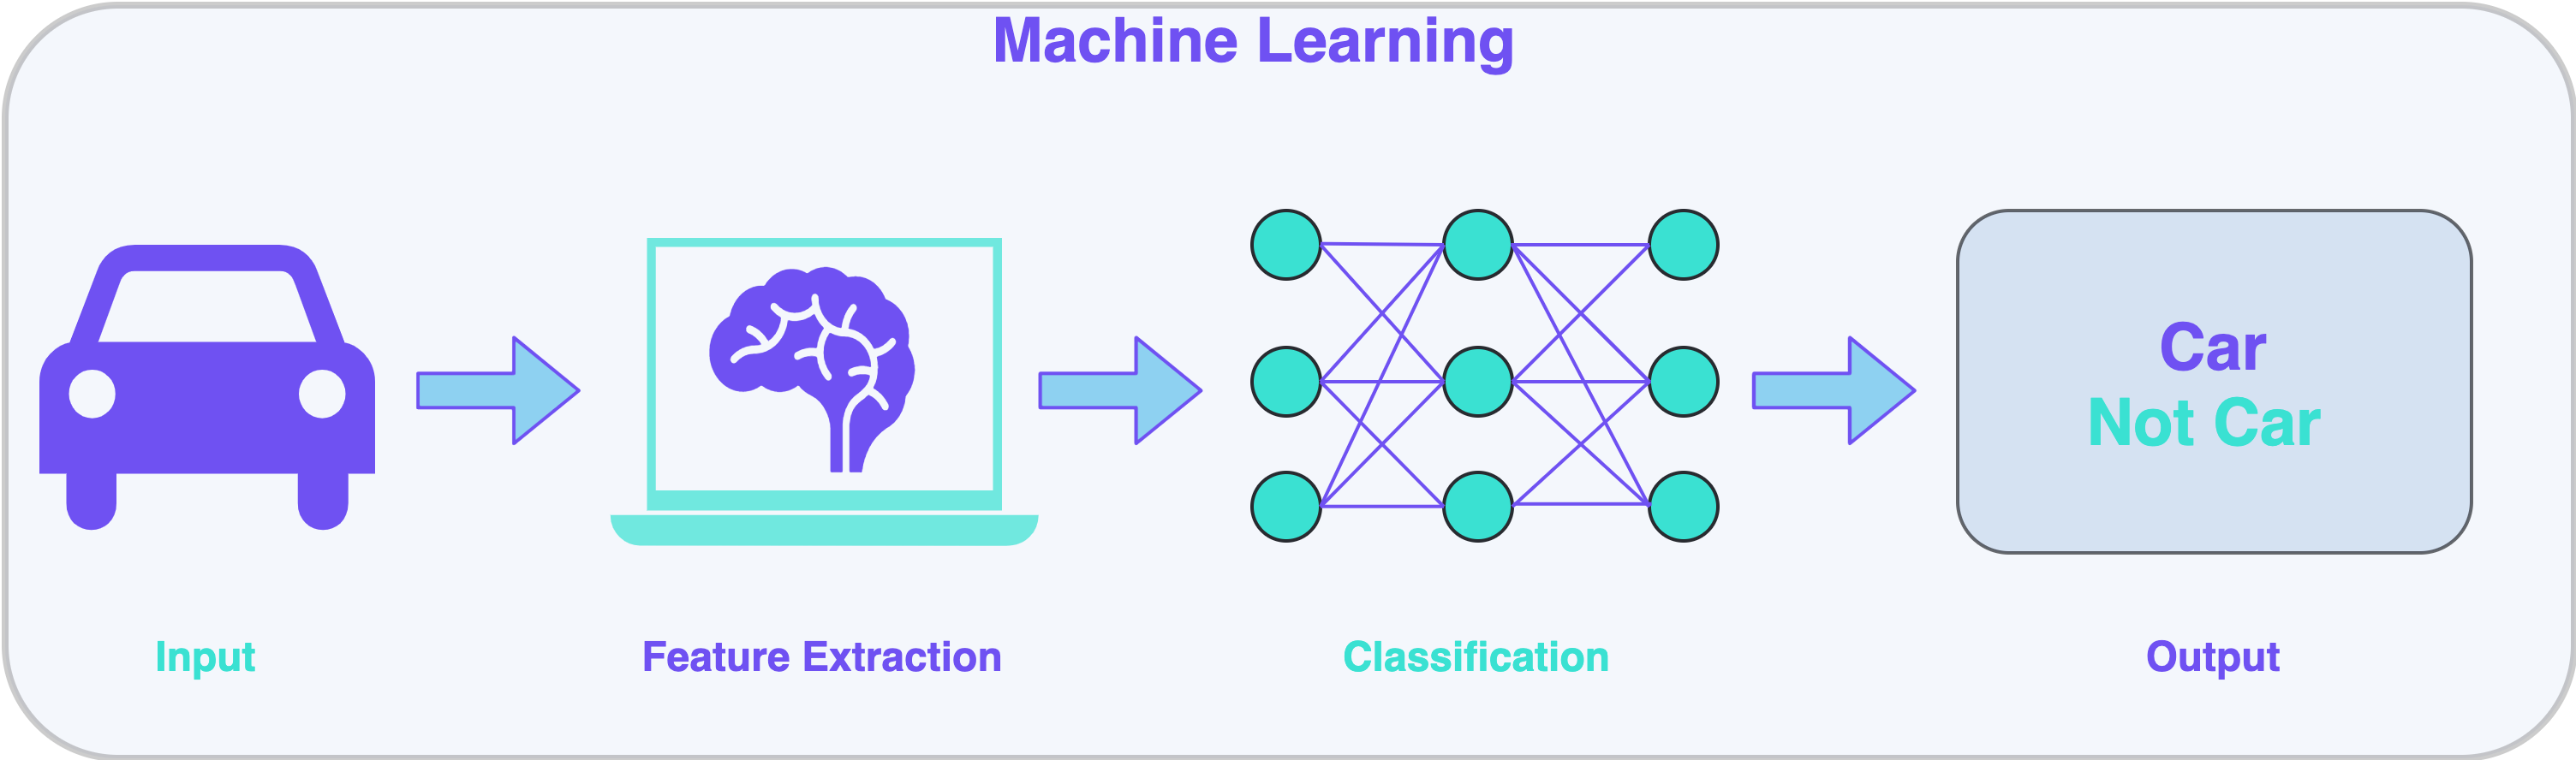

Pour extraire la valeur de sortie d'une couche intermédiaire d'un modèle, une méthode est de définir un nouveau Model en précisant en arguments :

input : l'input de notre ancien modèle avec old_model.input.
output : l'output d'une couche de notre ancien modèle avec model.layers[num_layer].output. Puis, on peut extraire la valeur de sortie en utilisant la méthode .predict() sur notre nouveau modèle :
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[num_layer].output)
output_num_layer = intermediate_layer_model.predict(inputs)
   L'attribut layers appliqué au modèle retourne la liste des couches du modèle.
Pour pouvoir extraire les features, nous allons devoir charger les images en mémoire.

(a) Exécuter la cellule suivante pour charger les images des n_class classes en mémoire.

In [ ]:
import os 
art = ['Albrecht_Durer', 'Andy_Warhol', 'Leonardo_da_Vinci', 'Marc_Chagall', 'Vincent_van_Gogh']

def load_data(path, art = art):
    img_list = []
    label_list = []
    for i in range(5):
        PATH = os.path.join(path,art[i])+'/'
        for filename in os.listdir(PATH):
            img=cv2.imread(os.path.join(PATH,filename))
            # Resize image
            img=cv2.resize(img,(224,224))
            # for the black and white image
            if img.shape==(224, 224):
                img=img.reshape([224,224,1])
                img=np.concatenate([img,img,img],axis=2)
            # cv2 load the image BGR sequence color (not RGB)
            img_list.append(img[...,::-1])
            label_list.append(i+1)
    return np.array(img_list), np.array(label_list)

# Load the images train
X_train, Y_train = load_data(path = 'Train/')

# Load the images test
X_test, Y_test = load_data(path = 'Test/')

(b) En utilisant la méthode d'extraction des features présentée dans la partie précédente, extraire les features de la couche 2 sous le nom X_train_features et X_test_features.
(c) Appliquer un SVM sur ces nouvelles données.

In [ ]:
from sklearn.svm import SVC
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[2].output)
X_train_features = intermediate_layer_model.predict(preprocess_input(X_train))
X_test_features = intermediate_layer_model.predict(preprocess_input(X_test))

svm = SVC(C=100)

svm.fit(X_train_features, Y_train)
svm.score(X_test_features, Y_test)

Nous remarquons que notre approche hybride rapporte de meilleures performances. Nous pouvons classifier l'artiste en fonction de ses oeuvres.

## Ce qu'il faut retenir :
Le schéma pour implémenter un modèle avec keras est très simple:

Architecture du modèle
Compilation du modèle
Entraînement du modèle
Diagnostic de l'entraînement
Évaluation des prédictions

Les générateurs de données permettent de charger les images lorsque le réseau en a besoin, et de leur appliquer des transformations différentes (rotation, zoom, décalage, ...) pour chaque iteration. Cette approche permet d'augmenter notre jeu de données et d'éviter au maximum le sur-apprentissage.

Les réseaux neurones convolutionnels (CNN) ont deux parties:

La partie des convolutions permet d'extraire les caractéristiques de nos images.
La partie Fully Connected Layers permet de classifier nos images.

Le transfer learning consiste à ré-utiliser la partie convolutionnelle d'un modèle pré-entrainé sur une autre tâche de classification.